# Random Forests

**import libraries**

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Random Forest and wine dataset

In [2]:
# Load the data and convert to a DataFrame
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['target'] = pd.Series(data.target)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
# Separate into features and target
X = df_wine.drop('target', axis=1)
y = df_wine['target']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#Create a Gaussian Classifier
rf_classifier=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_classifier.fit(X_train,y_train)

y_pred=rf_classifier.predict(X_test)
# Fit the model with our logistic regression classifier

print("model score: %.3f" % rf_classifier.score(X_test, y_test))

model score: 0.978


**Comparing random forest result to decsion tree**

- decision tree is overfit and has a lot of variation in results
- random forest is consistently accuret in this case

In [17]:
# Instantiate the classifier
dt_classifier=DecisionTreeClassifier()

# Train the model using the training sets
dt_classifier.fit(X_train,y_train)

# Find the model score
print("Decision tree model score: %.3f" % dt_classifier.score(X_test, y_test))

Decision tree model score: 0.889


**graph the comparisons of feature importance**

In [30]:
rfdtmportances = pd.DataFrame(rf_classifier.feature_importances_, X.columns, columns=['value'])
dt_importances = pd.DataFrame(dt_classifier.feature_importances_, X.columns, columns=['value'])

rf_importances = pd.DataFrame(rf_classifier.feature_importances_, X.columns, columns=['value'])
dt_importances = pd.DataFrame(dt_classifier.feature_importances_, X.columns, columns=['value'])

rf_importances.reset_index(inplace=True)
dt_importances.reset_index(inplace=True)

rf_importances = rf_importances.sort_values(by='value', ascending=True)
dt_importances = dt_importances.sort_values(by='value', ascending=True)

fig = px.bar(y=rf_importances['index'], x=rf_importances['value'], width=600, title="Random Forest Feature Importance")
fig.update_xaxes(range=[0, 0.5])
fig.show()

fig = px.bar(y=dt_importances['index'], x=dt_importances['value'], width=600, title="Decision Tree Feature Importance")
fig.update_xaxes(range=[0, 0.5])
fig.show()



### Label and Ordinal encoding

**creating data**

In [33]:
# Create the DataFrame
df = pd.DataFrame({
    'color':["a", "c", "a", "a", "b", "b", "d", "d", "c"], 
    'outcome':[1, 2, 0, 0, 1, 1, 3, 3, 2]})

# set up X and y
X = df.drop('outcome', axis = 1)
y = df.drop('color', axis = 1)

**Label Encoding**

In [36]:
label_enc = LabelEncoder()
encoded = label_enc.fit_transform(np.ravel(X)) 

print("\n The result of transforming X with LabelEncoder:")
print(encoded)
print(type(encoded))


 The result of transforming X with LabelEncoder:
[0 2 0 0 1 1 3 3 2]
<class 'numpy.ndarray'>


**Ordinal encoding**

- has a ranking problem

In [37]:
ordinal_enc = OrdinalEncoder()
ordinal_enc.fit_transform(X, y['outcome'])

array([[0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [3.],
       [3.],
       [2.]])

**one hot encoding and decsion trees**

if there is a lot of catogories and a few numerical features then a decsion tree will accosiat teh numerical featrues with much higer importance

## Exploring how categorical features affect diffrent models

### Mushroom dataset

target:
- edible or posion

In [38]:
url = 'https://tinyurl.com/y884c98f'
mushrooms = pd.read_csv(url)
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [41]:
# Create the feature matrix (drop the target column)
X = mushrooms.drop('class', axis=1)

# Create and encode the target column
le = preprocessing.LabelEncoder()
y = le.fit_transform(mushrooms['class'])

**Decision tree and logistic regression with one hot encoding**

In [44]:
# Set-up the one-hot encoder
categorical_features = X.columns
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

# Set up our preprocessor/column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Add the classifier to the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

**Decision tree model**

In [47]:
# Apply the pipeline

# Separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the model with our decision tree classifier
pipeline.fit(X_train, y_train)
print("Decision tree model score: %.3f" % pipeline.score(X_test, y_test))

Decision tree model score: 1.000


**Logistic Regression**

In [48]:
# Add the classifier to the preprocessing pipeline
pipeline_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

# Apply the pipeline

# Separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the model with our logistic regression classifier
pipeline_logreg.fit(X_train, y_train)
print("Logistic regression model score: %.3f" % pipeline_logreg.score(X_test, y_test))

Logistic regression model score: 1.000


**Decsion Tree with ordinal encoding**

In [49]:
# Set-up the ordinal encoder

categorical_features = X.columns
categorical_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder())])

# Set up our preprocessor/column transformer
preprocessor_ord = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Add the classifier to the preprocessing pipeline
pipeline_ord = Pipeline(steps=[('preprocessor_ord', preprocessor_ord),
                      ('classifier', DecisionTreeClassifier())])

In [50]:
# Fit the model with our logistic regression classifier
pipeline_ord.fit(X_train, y_train)
print("Decision tree model score (ordinal encoded): %.3f" % pipeline_ord.score(X_test, y_test))

Decision tree model score (ordinal encoded): 1.000


## Comparing accurcy between decsion tree and random forest in penguins dataset

In [63]:
penguins = sns.load_dataset("penguins")

# Remove NaNs and nulls
penguins.dropna(inplace=True)

display(penguins.head())

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [64]:
# Create feature matrix
X = penguins.drop(['species', 'island', 'sex'], axis=1)

# Create the target array
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(penguins['sex'])

# Create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**Fitting model with logistic regression**

In [65]:
# Fit the model with a logistic regression classifier

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Logistic regression model score: %.3f" % logreg.score(X_test, y_test))

Logistic regression model score: 0.786


**Fitting model with decsion tree**

In [66]:
# Fit the model with a decision tree classifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("Decision tree model score: %.3f" % tree.score(X_test, y_test))

Decision tree model score: 0.786


**Fitting model with random forest**

In [75]:
# Fit the model with a random forest classifier

trees_rand = RandomForestClassifier(n_estimators=100)
trees_rand.fit(X_train, y_train)
print("Random forest model score: %.3f" % trees_rand.score(X_test, y_test))

Random forest model score: 0.845


**Look at accuracy for a different number of trees**

In [68]:
# Fit the model with a decision tree classifier

tree = DecisionTreeClassifier(max_depth=100)
tree.fit(X_train, y_train)
print("Decision tree model score: %.3f" % tree.score(X_test, y_test))

print("Decision tree model score: %.3f" % tree.score(X_train, y_train))

Decision tree model score: 0.810
Decision tree model score: 1.000


In [69]:
# Look at training accuracy vs. test accuracy

# Decision tree
accuracy_train = []
accuracy_test = []

for i in range(1, 160, 5):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    accuracy_test.append(tree.score(X_test, y_test))
    accuracy_train.append(tree.score(X_train, y_train))

In [70]:
# Look at training accuracy vs. test accuracy

# Random forest
rf_accuracy_train = []
rf_accuracy_test = []

for i in range(1, 160, 5):
    tree = RandomForestClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    rf_accuracy_test.append(tree.score(X_test, y_test))
    rf_accuracy_train.append(tree.score(X_train, y_train))

Text(0.5, 1.0, 'Random Forest')

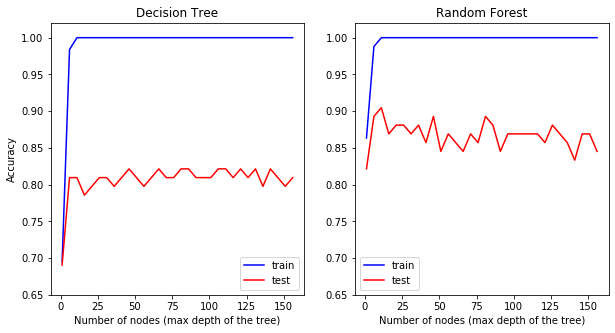

In [71]:
# Plot the results of the train vs. test accuracy
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

xvals = range(1, 160, 5)
ax1.plot(xvals, accuracy_train, color='b', label='train')
ax1.plot(xvals, accuracy_test, color='red', label='test')
ax1.legend()

ax2.plot(xvals, rf_accuracy_train, color='b', label='train')
ax2.plot(xvals, rf_accuracy_test, color='red', label='test')
ax2.legend()

ax1.set_ylim([0.65, 1.02])
ax2.set_ylim([0.65, 1.02])

ax1.set_xlabel('Number of nodes (max depth of the tree)')
ax2.set_xlabel('Number of nodes (max depth of the tree)')
ax1.set_ylabel('Accuracy')
ax1.set_title('Decision Tree')
ax2.set_title('Random Forest')

